<a href="https://colab.research.google.com/github/carlottaviappiani/MLPNS_CViappiani/blob/main/NeuralNetworks_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
#def input neuroni: ho 4 osservazioni (dati in arrivo alla sinapsi) definite da queste 3 coordinate (li vedo come coordinate nel piano true/false,
# o 0/1) o come valore (che è quello che vedo nel grafico dopo)--> 3 neuroni x 4 osservazioni
X=np.array(
    [[0,0,1],[1,1,1],[1,0,1],[0,1,1]]
)

(-0.5, 2.5, 3.5, -0.5)

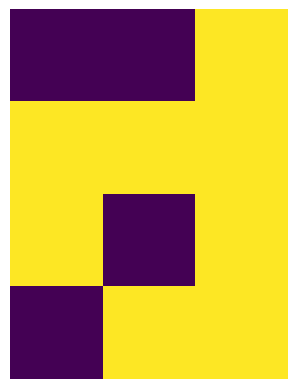

In [3]:
pl.imshow(X)
pl.axis('off')

In [4]:
#definisco l'output che vorrò ottenere alla fine: (4 x 1: 4 osservazioni nel 1 nodo finale): quindi voglio allenare 
#il network affinchè impariche la prima delle osservazioni [0,0,1] dia 0 and so on...
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
y.shape

(4, 1)

In [6]:
print('input\n',X)
print('output\n',y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#Basic architecture:1 layer (perceptor)
4 osservazioni\
3 neuroni\
1 layer


In [7]:
#Secondo me abbiamo 1 neurone e 1 layer: abbiamo 4 osservazioni, ognuna costituita da 3 coordinate a cui associamo ciscuna un peso,
#e abbiamo un solo layer: stiamo considerando un singolo neurone, ma consideriamo simulataneamente tutte e 4 le osservazioni
#pallino=neurone, colonna pallini=layer, osservazioni=coppie input(e.g[0,0,1])-output(e.g 0) noto su cui lo alleno

In [8]:
#Vogliamo che la rete capisca che dati degli input (osservazioni X) corrispondono determinati output (y)

In [9]:
#def le funzioni che mi serviranno

In [10]:
#def sigmoide perchè voglio una funzione smooth tra 0 e 1 (che sia derivabile)
def sigmoid(x):
  return 1./(1.+np.exp(-x))

In [11]:
#def la derivata della sigmoide
def dsigmoid(x):
  return x*(1.-x)

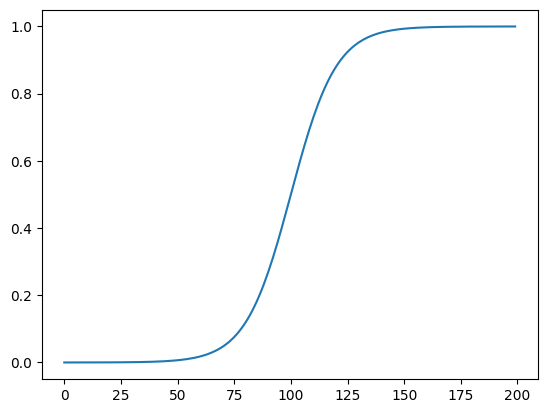

In [12]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [13]:
#def la loss function per data punto (ogni punto lo tratto come intero dataset), passandogli la predizione e target
#la distanza tra pred e target la calcolo come L1 per semplicità
def loss(prediction,target):
  return target-prediction

#Neural network

In [14]:
np.random.seed(302)

In [15]:
#numero di passi di iterazione
training=6000

In [16]:
#layer of synopses/neurons: voglio che ci siano 4 predizioni in 3 dimesioni e voglio un output cioè 3x 1 e ne devo fare il dot product
#4 x 3 dot 3 x 1

#Qui faccio una prima guess iniziale dei pesi (random): creo array 3x1 di pesi casuali, che vado ad associare alle tre coordinate di ognuna 
#delle 4 osservazioni e.g oservazione 1 [0,0,1]*[w1,w2,w3] (a ognuna delle 3 componenti associo uno dei 3 pesi) 
syn0=2*np.random.random((3,1))-1
#perchè voglio che i w siano tra -1 e 1
syn0

array([[ 0.27256242],
       [ 0.65008468],
       [-0.31671053]])

In [17]:
#per ogni iterazione ho input X, [qui non c'è: poi calcolo b con predizione L1 (regression) (ho 1 bias b qui perchè ho un solo layer)]
#calcolo somma w_i*x_i e output modulato tramite sigmoide con la funzione di attivazione (f), perchè quello che voglio fare è:
#y(output)=f(act funct)*(sum(pesi w*input x) + b (bias))
#voglio fare però training quindi ogni iterazione cambio peso delle sinapsi tramite gli errori che calcolo nel codice
#così gli faccio ripetere il processo più volte (learning)

loss_output=[] 
#per vedere l'aggiustamento del modello in funzione delle epochs (steps): vorrò che vada a 0 con gli errori, ma non troppo se no overfitting
for iter in range(training):
  #1. Input 4 osservazioni
  inputLayer=X
  #Forward Propagation
  #2. sommo su tutte le w_i*x_i
  l1=np.dot(inputLayer,syn0)
  #3. activation function: prendo l1 e tramite la f function modulo output come una sigmoide
  #deve stare tra 0 e 1 (per output) e iniettiva 
  output=sigmoid(l1)

  #backward propagation
  #2. calculate error: used to modify the weights of every connections to the output neuron right after
  #calcola la differnza tra l'output che ha ottenuto lui e l'output y che voglio che impari
  #una volta calcolato l'errore, cambia i pesi e riparte dall'inizio, così tutte le volte aggiusta la guess
  output_error=loss(output,y)
  loss_output.append(np.abs(output_error).sum())
  #3. calculate correction
  output_delta=output_error*dsigmoid(output) #il segno della correzione per i weights viene dall'output error
  #4. apply to weights: applico correzione ai weights riscalandoli
  syn0+=np.dot(inputLayer.T,output_delta)  #backpropagation (correzione sui pesi)

print('output after training\n',output)
print('output target\n',y)

output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

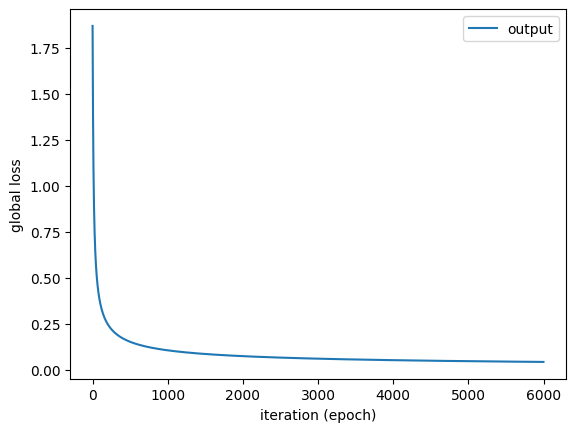

In [18]:
pl.plot(loss_output,label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('global loss')

#Add a layer (Multi-layer)


In [19]:
#nel pezzo precedente ho analizzato cosa succede nel singolo neurone, ora vogliamo considerare il caso generico in cui ho 
#un numero qualsiasi di neuroni (ognuno dei quali si comporta come appena visto) e un numero qualunque di layer (ogni layer richiama quello prima
#come input)

In [21]:
np.random.seed(302)
#i layer sono quindi del tipo: 
#4x3 (4 osservazioni, per ognuna 3 pesi)-->3x5-->5x1 ecc. 
#faccio come prima però il primo layer diventa input per il secondo
#definisco i due weights per i due layer
#le osservazioni sono semore le 4 X ma cambio rete neurale
#1 layer: 5 neuroni e 3 weights
#2 layer: 1 neurone e 5 weights 
# 4x3 -> 3x5 ->5x1 => 4x1
syn0 =  2 * np.random.random((3, 5)) - 1 #normalizzati 0-1
syn1 =  2 * np.random.random((5, 1)) - 1 #normalizzati 0-1


loss_output = []
loss_hidden = []

for iter in range(training):
  #1. input data (ognuna delle 4 osservazioni, ciascuna descritta da 3 coordinate)
  inputLayer = X
  
  # forward propagation

  #1 layer

  #2. linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #3. activations: l'output diventa input del secondo layer
  #ed è detto hidden layer
  hidden = sigmoid(l1) #i neuroni del primo layer sputano ognuno uno scalare 

  #2 layer

  #4. linear regression
  l2 = np.dot(hidden, syn1)
  #5. activations
  output = sigmoid(l2)

  #6. calculate error on second layer
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # backward propagation: torno indietro e trovo le correzioni a ogni livello

  #calculate correction
  output_delta = output_error * dsigmoid(output)

  #error on the first layer 
  hidden_error = output_delta.dot(syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())

  hidden_delta = hidden_error * dsigmoid(hidden)

  #apply correction to weights
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

output after training
 [[0.00648042]
 [0.99370941]
 [0.99426848]
 [0.00489822]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

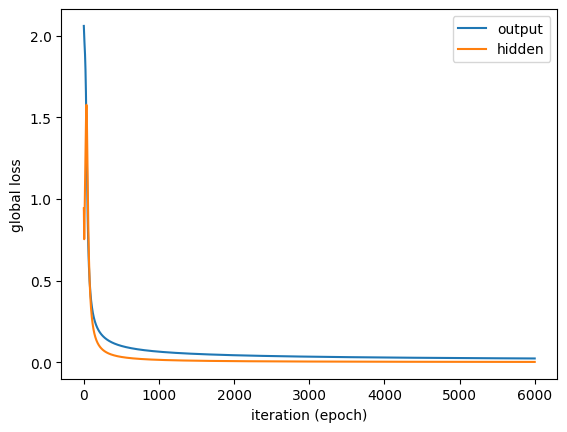

In [22]:
pl.plot(loss_output,label='output')
pl.plot(loss_hidden,label='hidden')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('global loss')

#Convolutional Neural Networks

In [23]:
from tensorflow import keras


In [24]:
#hidden layer
hlayer=keras.layers.Dense(5,input_dim=3,activation='sigmoid') 
#che prende in input: numero neuroni che voglio nel layer, numero input e funzione attivazione (sigmoide)
#output layer
olayer=keras.layers.Dense(1,activation='linear') 
#modello 
model=keras.Sequential([hlayer,olayer]) 
#sequential perchè ho una direzione: verso dx per la forward e sx per la forward propagation, input: layer creati
model.summary() #visualizzo modello

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [27]:
#compilo modello: scelgo parametri mae (mean absolute error) come loss function, parametri di train (algoritmo per il gradient discend)
# adam e la metrica accuracy
model.compile(loss='mae',optimizer='adam',metrics=['accuracy','mae'])

In [28]:
#fitto il modello ai dati
model.fit(X,y,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4146 - accuracy: 0.7500 - mae: 0.4146
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4140 - accuracy: 0.7500 - mae: 0.4140
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4135 - accuracy: 0.7500 - mae: 0.4135
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4130 - accuracy: 0.7500 - mae: 0.4130
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.4124 - accuracy: 0.7500 - mae: 0.4124
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4119 - accuracy: 0.7500 - mae: 0.4119
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4113 - accuracy: 0.7500 - mae: 0.4113
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.4108 - accuracy: 0.7500 - mae: 0.4108
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4102 - accuracy: 0.7500

In [29]:
#guardo se la predizione fatta è buona
model.predict(X)

1/1 [==============================] - 0s 153ms/step


array([[4.7102571e-04],
       [9.9888384e-01],
       [1.0001926e+00],
       [2.2727251e-04]], dtype=float32)

In [ ]:
#lo è (molto simile alla y che volevo)